### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Simple Keras 모델 생성/학습 - XOR Function

In [1]:
# 1. Numpy 가져오기
import numpy as np

In [2]:
# 2. 입력/출력 데이터 만들기
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [3]:
# 3. Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense

In [4]:
# 4. MLP 모델 생성
model = keras.Sequential()

# network 생성
model.add(Dense(input_dim = 2, units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 5. Compile - Optimizer, Loss function 설정
sgd = keras.optimizers.SGD(lr = 1)
model.compile(loss = 'binary_crossentropy', optimizer = sgd)

In [6]:
# 6. 학습시키기
model.fit(X, y,
        batch_size = 1,
         epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9725
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1044
Epoch 3/100
4/4 [==============================] - 0s 991us/step - loss: 0.9662
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8046
Epoch 5/100
4/4 [==============================] - 0s 899us/step - loss: 0.9312
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9978
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7185
Epoch 8/100
4/4 [==============================] - 0s 984us/step - loss: 1.0591
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9309
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6881
Epoch 11/100
4/4 [==============================] - 0s 818us/step - loss: 1.0437
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8493
Epoch 13/100
4/4 [==============================] - 0

In [7]:
# 7. 모델 테스트하기
test_data = np.array([[0,1], [0,0], [1,1]]) # 1,0,1
print(model.predict_classes(test_data))

print(model.predict(test_data))
print(model.get_weights())


[[0]
 [0]
 [0]]
[[0.3407583 ]
 [0.4279576 ]
 [0.22440854]]
[array([[-0.58024085],
       [-0.3697279 ]], dtype=float32), array([-0.29018903], dtype=float32)]


/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# MLP
XOR의 경우 한가지 Layer으로 문제를 풀 수 없으므로 다중 Layer Perceptron으로 해결해야 한다.

In [21]:
# 4. MLP 모델 생성
model_mlp = keras.Sequential()

# network 생성
model_mlp.add(Dense(input_dim = 2, units = 3, activation = 'relu'))
#model_mlp.add(Dense(units = 32, activation = 'relu'))
#model_mlp.add(Dense(units = 16, activation = 'relu'))
#model_mlp.add(Dense(units = 16, activation = 'relu'))
model_mlp.add(Dense(units = 2, activation = 'relu'))
model_mlp.add(Dense(units = 1, activation = 'sigmoid'))

In [22]:
model_mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile
sgd = keras.optimizers.SGD(lr = 0.1)
model_mlp.compile(loss = 'binary_crossentropy', optimizer = sgd)

# 모델 학습
model_mlp.fit(X, y,
        batch_size = 1,
         epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6972
Epoch 2/100
4/4 [==============================] - 0s 820us/step - loss: 0.6841
Epoch 3/100
4/4 [==============================] - 0s 899us/step - loss: 0.7018
Epoch 4/100
4/4 [==============================] - 0s 842us/step - loss: 0.6888
Epoch 5/100
4/4 [==============================] - 0s 776us/step - loss: 0.6774
Epoch 6/100
4/4 [==============================] - 0s 891us/step - loss: 0.7067
Epoch 7/100
4/4 [==============================] - 0s 859us/step - loss: 0.6888
Epoch 8/100
4/4 [==============================] - 0s 851us/step - loss: 0.6993
Epoch 9/100
4/4 [==============================] - 0s 862us/step - loss: 0.6996
Epoch 10/100
4/4 [==============================] - 0s 861us/step - loss: 0.6654
Epoch 11/100
4/4 [==============================] - 0s 942us/step - loss: 0.7040
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6803
Epoch 13/100
4/4 [=======================

In [24]:
test_data = np.array([[0,1], [0,0], [1,1]]) # 1,0,0
print(model_mlp.predict_classes(test_data))

print(model_mlp.predict(test_data))


[[1]
 [0]
 [0]]
[[0.73323095]
 [0.10955518]
 [0.03525406]]


### optimizer 조정

In [32]:
# 4. MLP 모델 생성_adam
model_mlp1 = keras.Sequential()

# network 생성
model_mlp1.add(Dense(input_dim = 2, units = 3, activation = 'relu'))
model_mlp1.add(Dense(units = 2, activation = 'relu'))
model_mlp1.add(Dense(units = 1, activation = 'sigmoid'))

In [33]:
# compile
adam = keras.optimizers.Adam(lr = 0.1)
model_mlp1.compile(loss = 'binary_crossentropy', optimizer = adam)

# 모델 학습
model_mlp1.fit(X, y,
        batch_size = 1,
         epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7337
Epoch 2/100
4/4 [==============================] - 0s 874us/step - loss: 0.6210
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7901
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5412
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4487
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6117
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 8/100
4/4 [==============================] - 0s 942us/step - loss: 0.6003
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3828
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5706
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3077
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4622
Epoch 13/100
4/4 [==============================] - 0s 2m

In [34]:
test_data = np.array([[0,1], [0,0], [1,1]]) # 1,0,0
print(model_mlp1.predict_classes(test_data))

print(model_mlp1.predict(test_data))


[[1]
 [0]
 [0]]
[[9.7523189e-01]
 [4.2629242e-04]
 [1.1666524e-04]]


#### 초기 값에 따라서 보델의 성능이 차이가 난다!!  
#### 대체적으로 momemtum까지 고려하는 adam이 sgm 보다 성능이 더 좋다!!
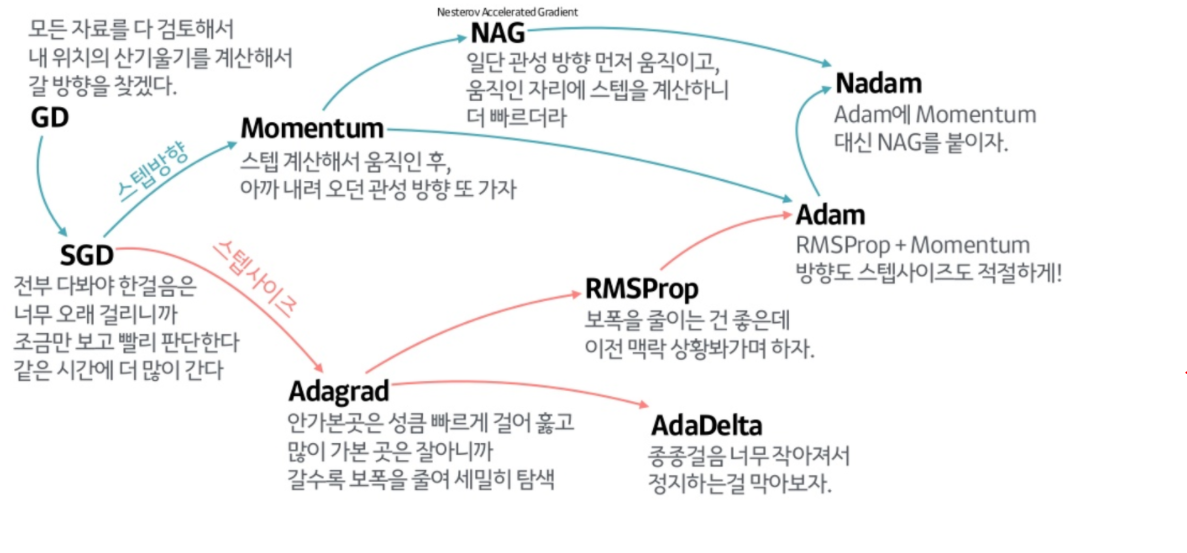
 